In [2]:
# The usual preamble
%matplotlib inline
import polars as pl
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')

pl.Config.set_tbl_cols(60)
pl.Config.set_fmt_str_lengths(5000)

plt.rcParams['figure.figsize'] = (15, 5)

We saw earlier that pandas is really good at dealing with dates. It is also amazing with strings! We're going to go back to our weather data from Chapter 5, here.

In [3]:
weather_2012 = pl.read_csv('./data/weather_2012.csv',separator=',',encoding='latin1').with_columns(pl.col('Date/Time (LST)').str.strptime(pl.Datetime, format='%Y-%m-%d %H:%M'))
weather_2012 = weather_2012.with_columns([pl.col('Date/Time (LST)').cast(pl.Datetime)]).sort('Date/Time (LST)')
weather_2012[:5]

ï»¿Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (C),Temp Flag,Dew Point Temp (C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
f64,f64,str,i64,datetime[μs],i64,i64,i64,str,f64,str,f64,str,i64,str,str,str,i64,str,i64,str,f64,str,f64,str,str,str,i64,str,str
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 00:00:00,2012,3,1,"""00:00""",-5.5,null,-9.7,null,72,null,null,null,5,null,24,null,4.0,null,100.97,null,null,null,-13,null,"""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 01:00:00,2012,3,1,"""01:00""",-5.7,null,-8.7,null,79,null,null,null,6,null,26,null,2.4,null,100.87,null,null,null,-13,null,"""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 02:00:00,2012,3,1,"""02:00""",-5.4,null,-8.3,null,80,null,null,null,5,null,28,null,4.8,null,100.8,null,null,null,-13,null,"""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 03:00:00,2012,3,1,"""03:00""",-4.7,null,-7.7,null,79,null,null,null,5,null,28,null,4.0,null,100.69,null,null,null,-12,null,"""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 04:00:00,2012,3,1,"""04:00""",-5.4,null,-7.8,null,83,null,null,null,5,null,35,null,1.6,null,100.62,null,null,null,-14,null,"""Snow"""


# 6.1 String operations

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great [examples](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods) in the documentation.

In [4]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

This gives us a binary vector, which is a bit hard to look at, so we'll plot it.

In [5]:
# Not super useful
is_snowing[:5]

Weather
bool
true
true
true
true
true


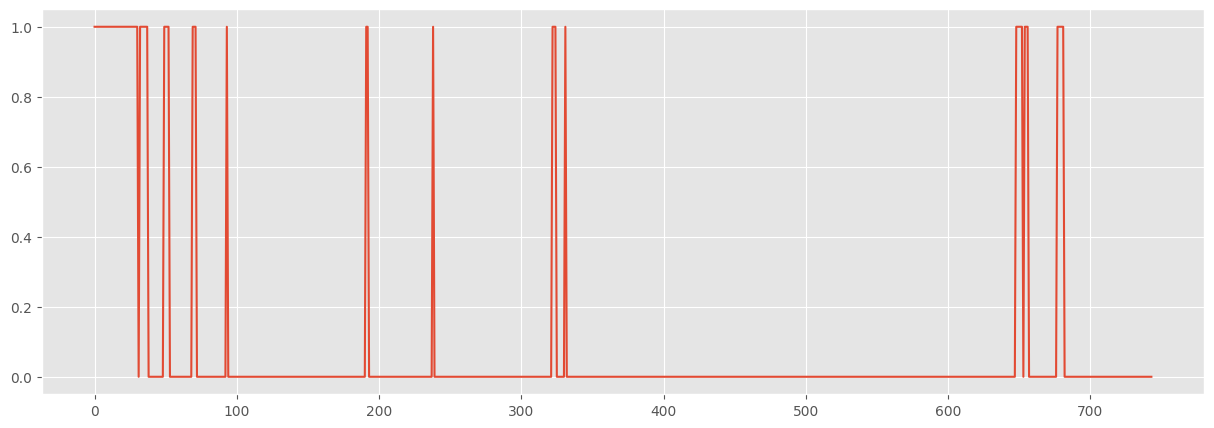

In [ ]:
# More useful!
is_snowing_float = is_snowing.cast(pl.Float64)
is_snowing_float.to_pandas().plot()
plt.show()

# 6.2 Use resampling to find the snowiest month

If we wanted the median temperature each month, we could use the `resample()` method like this:

In [ ]:
#HERE
# weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')
(weather_2012
    .group_by_dynamic("index", every="1mo")     # Use your datetime column name
    .agg(pl.col("Temp (C)").median())
    .sort("index")
    .to_pandas()
    .plot(kind="bar", x="index", y="Temp (C)")
)
plt.show()

SchemaFieldNotFoundError: index

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'group_by' <---
DF ["ï»¿Longitude (x)", "Latitude (y)", "Station Name", "Climate ID"]; PROJECT */30 COLUMNS

Unsurprisingly, July and August are the warmest.

So we can think of snowiness as being a bunch of 1s and 0s instead of `True`s and `False`s:

In [15]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

and then use `resample` to find the percentage of time it was snowing each month

In [16]:
is_snowing.astype(float).resample('M').apply(np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

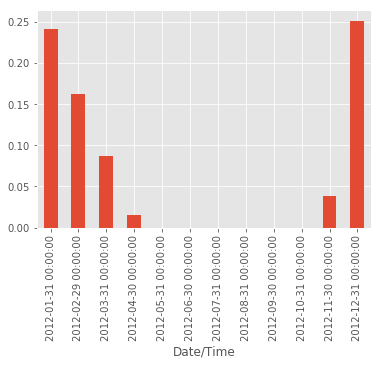

In [17]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.

# 6.3 Plotting temperature and snowiness stats together

We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:

In [18]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

We'll use `concat` again to combine the two statistics into a single dataframe.

In [19]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


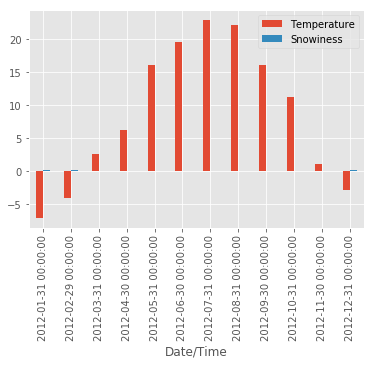

In [20]:
stats.plot(kind='bar')

Uh, that didn't work so well because the scale was wrong. We can do better by plotting them on two separate graphs:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11529cfa0>,
      dtype=object)

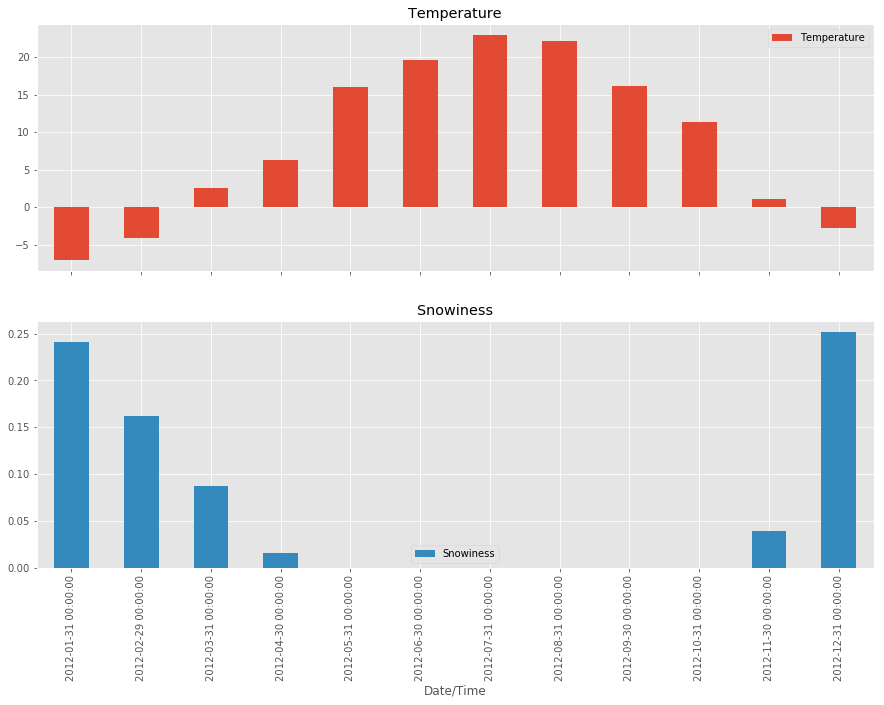

In [21]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  